<h1 style="text-align:center;font-size:50px">Covid-19 Data Analysis</h1>

In [165]:
# Importing necessary libraries

import pandas as pd  # For dataframe manipulations & making queries
import numpy as np  # For array based operations
import matplotlib.pyplot as plt  # For data visualization 
import seaborn as sns  # For data visualization

# Display all columns of the dataframe
pd.pandas.set_option('display.max_columns', None)

# Setting global parameters for data-visualization
sns.set(style='darkgrid')
plt.rcParams["figure.figsize"] = (12,5)

<h1>1) Data Loading</h1>

**The data is stored in a csv file. I will be using pandas library to load the file.**

In [149]:
file_name = "owid-covid-data.csv"

# Loading CSV file
df = pd.read_csv(file_name)

# Displaying the first 5 rows of the dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


<h1>2) Checking dimensionality</h1>

**Now lets find out the dimensionality of data.**

In [150]:
print("No.of rows in dataset :- {}".format(df.shape[0]))
print("No.of columns in dataset :- {}".format(df.shape[1]))

No.of rows in dataset :- 27381
No.of columns in dataset :- 34


<h1>3) Exploratory Data Analysis</h1>
<br>

**This would involve making basic queries to get an overview of the data.**

- High level overview of data in all columns.
- Span of observations
- Country with highest & lowest no.of total cases
- Comparing different countries on the basis of no.of total cases
- Country with highest & lowest no.of casualties
- Comparing different countries on the basis of no.of casualties
- Country with highest & lowest no.of hospital beds per thousand
- Comparing different countries on the basis of no.of hospital beds per thousand

<h3>3.1) High level overview of data in all columns</h3>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27381 entries, 0 to 27380
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         27317 non-null  object 
 1   continent                        27133 non-null  object 
 2   location                         27381 non-null  object 
 3   date                             27381 non-null  object 
 4   total_cases                      27166 non-null  float64
 5   new_cases                        27166 non-null  float64
 6   total_deaths                     27166 non-null  float64
 7   new_deaths                       27166 non-null  float64
 8   total_cases_per_million          27102 non-null  float64
 9   new_cases_per_million            27102 non-null  float64
 10  total_deaths_per_million         27102 non-null  float64
 11  new_deaths_per_million           27102 non-null  float64
 12  total_tests       

**We can see that other than location & date columns rest of the columns have missing values.**

<h3>3.2) Span of observations</h3>

**This is the no.of days for which the data was recorded.**

In [ ]:
print("No.of observations per country :- {}".format(len(list(df['date'].unique()))))

No.of observations per country :- 184


In [132]:
# Utility functions
def find_highest_vals(df, attribute):
"""
Input :- Dataframe, Attribute (column name)
Output :- Highest values in the given column for the given dataset
"""
  hi_attr_country = df.loc[df[attribute].idxmax()]['location']
  hi_attr_num = df.loc[df[attribute].idxmax()][attribute]

  return (hi_attr_country, hi_attr_num)


def find_least_vals(df, attribute):
"""
Input :- Dataframe, Attribute (column name)
Output :- Least values in the given column for the given dataset
"""    
  low_attr_country = df.loc[df[attribute].idxmin()]['location']
  low_attr_num = df.loc[df[attribute].idxmin()][attribute]

  return (low_attr_country, low_attr_num)

In [151]:
# Slicing dataframe to take appropriate rows
df = df.drop(df.index[27135:])
df = df[df.location != 'World']

# Selecting only last observations for each country 
df_last_obs = df[df['date'] == '2020-07-01']

df_selected = df_last_obs[df_last_obs['location'].isin(["India", "Russia", "United States",
                                                        "Brazil", "China", "Japan", "United Kingdom",
                                                        "South Korea", "France", "Italy"])]                                                                                              

<h3>3.3) Country with highest & lowest no.of Covid-19 cases</h3>

In [133]:
hi_cases_country, hi_cases_num = find_highest_vals(df_last_obs, 'total_cases')
print("{} has the highest no.of total cases with {} people affected".format(hi_cases_country,
                                                                            int(hi_cases_num)))

low_cases_country, low_cases_num = find_least_vals(df_last_obs, 'total_cases')
print("{} has the lowest no.of total cases with only {} people affected".format(low_cases_country,
                                                                          int(low_cases_num)))

United States has the highest no.of total cases with 2634432 people affected
Anguilla has the lowest no.of total cases with only 3 people affected


<h3>3.4) How were some other countries affected ?</h3>

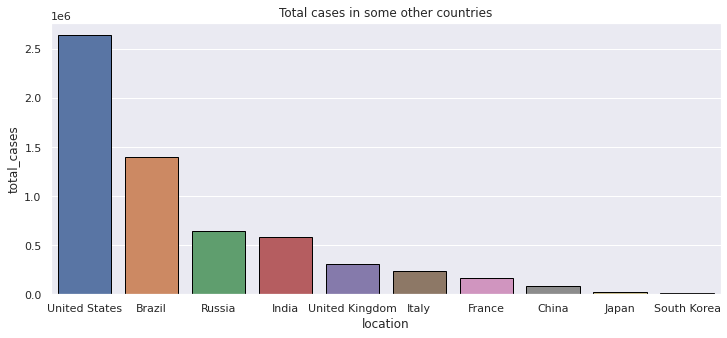

In [168]:
df_sorted_by_cases = df_selected.sort_values(['total_cases'],
                                             ascending=False).reset_index(drop=True)
sns.barplot(x="location", y="total_cases", data=df_sorted_by_cases, edgecolor=(0,0,0))
plt.title("Total cases in some other countries")
plt.show()

**Observations :-**

- USA, Brazil are the most affected.
- Japan, South Korea are least affected.

<h3>3.5) Country with highest & lowest no.of casualties</h3>

In [135]:
# Highest no.of casualties
hi_casualties_country, hi_casualties_num = find_highest_vals(df_last_obs, 'total_deaths')
print("{} has the highest no.of casualties with {} people deceased".format(hi_casualties_country,
                                                                            int(hi_casualties_num)))
# Least no.of casualties
low_casualties_country, low_casualties_num = find_least_vals(df_last_obs, 'total_deaths')
print("{} has the lowest no.of total cases with only {} people deceased".format(low_casualties_country,
                                                                          int(low_casualties_num)))

United States has the highest no.of casualties with 127410 people deceased
Anguilla has the lowest no.of total cases with only 0 people deceased


<h3>3.6) Comparing no.of casualties in different countries</h3>

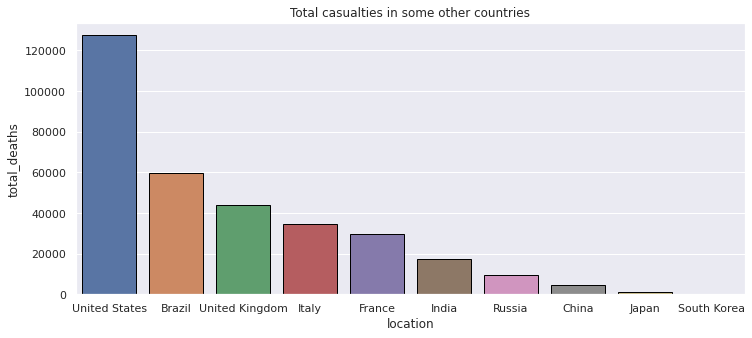

In [169]:
df_sorted_by_deceased = df_selected.sort_values(['total_deaths'],
                                             ascending=False).reset_index(drop=True)
sns.barplot(x="location", y="total_deaths", data=df_sorted_by_deceased, edgecolor=(0,0,0))
plt.title("Total casualties in some other countries")
plt.show()

**Observation :-**

Similar to above observation here also we see

- USA, Brazil to have most no.of casualties.
- Japan, South Korea to have least no.of casualties.

<h3>3.7) Country with highest & lowest no.of hospital beds per thousand</h3>

We can use no.of hospital beds per thousand as a metric to find out how countries were prepared to face a pandemic situation.

In [15]:
# Highest no.of hospital beds
hi_hosp_beds_country, hi_hosp_beds_num = find_highest_vals(df_last_obs, 'hospital_beds_per_thousand')
print("{} has the highest no.of hospital beds with {} per thousand of population".format(hi_hosp_beds_country,
                                                                            int(hi_hosp_beds_num)))
# Least no.of hospital beds
low_hosp_beds_country, low_hosp_beds_num = find_least_vals(df_last_obs, 'hospital_beds_per_thousand')
print("{} has the lowest no.of hospital beds with only {} peor thousand of population".format(low_hosp_beds_country,
                                                                          int(low_hosp_beds_num)))

Monaco has the highest no.of hospital beds with 13 per thousand of population
Mali has the lowest no.of hospital beds with only 0 peor thousand of population


**Monaco being a very small but rich country should not surprise anyone for having most no.of hospital beds per thousand.**

<h3>3.8) Comparison of no.of medical treatment facilities in different countries</h3>

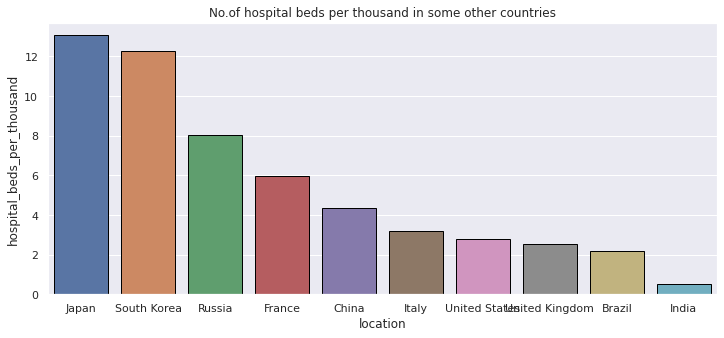

In [171]:
df_sorted_by_hosp_beds = df_selected.sort_values(['hospital_beds_per_thousand'],
                                             ascending=False).reset_index(drop=True)
sns.barplot(x="location", y='hospital_beds_per_thousand', data=df_sorted_by_hosp_beds, edgecolor=(0,0,0))
plt.title("No.of hospital beds per thousand in some other countries")
plt.show()

**Observations :-**

- Japan, South Korea have the highest no.of beds per thousand among the selected coutries observed.
- India, Brazil have the lowest.

<h2>Overall observations :-</h2>
<br>

- **USA, Brazil are among the worst affected countries as of 1st July 2020.**
<br>

- **South Korea & Japan have the lowest no.of people affected & hence lowest in terms of casualties. This is an eye-opening observation given the close proximity of both countries to China (origin of Covid-19 virus).**
<br>

- **We also observe that these two countries have the highest no.of hospital beds per thousand of population. Hence from the given data, we may roughly that these countries were better prepared for handling such a pandemic situation.**
<br>

- **Even though China & India roughly have the same population, India lags so much behind China in terms of medical preparedness for dealing with such a pandemic situation. This is a matter of concern.**

<h1>4) Finding missing values </h1>

In [77]:
# Utility function
def Sort(li):
  """
  Input :- List of lists
  E.g :- [['abc',5], ['def','7'],['ghi',9]]
  
  Output :- List of lists in sorted order w.r.t second element of every internal element.
  E.g :- [['ghi',9], ['def',7], ['abc',5]]
  """
  return sorted(li, key=lambda x:x[1], reverse=True)

In [96]:
## Here I will check the percentage of nan values present in each feature

## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum() > 1]

percent_miss_vals = []

## 2- Storing percentage of missing values in a list
for feature in features_with_na:
    percent_miss_vals.append([feature, np.round(df[feature].isnull().mean() * 100, 4)])

## 3- Sorting the list in reverse order
percent_miss_vals_sorted = Sort(percent_miss_vals)

## 4- Printing the list
for li in percent_miss_vals_sorted:
    print("{} % values missing in {} column".format(li[1], li[0]))

73.9469 % values missing in new_tests column
73.9469 % values missing in new_tests_per_thousand column
71.4186 % values missing in total_tests column
71.4186 % values missing in total_tests_per_thousand column
69.0967 % values missing in new_tests_smoothed column
69.0967 % values missing in new_tests_smoothed_per_thousand column
66.8153 % values missing in tests_units column
59.4811 % values missing in handwashing_facilities column
40.4747 % values missing in extreme_poverty column
28.5188 % values missing in male_smokers column
27.6711 % values missing in female_smokers column
19.1943 % values missing in stringency_index column
17.3368 % values missing in hospital_beds_per_thousand column
10.8503 % values missing in aged_65_older column
10.5923 % values missing in gdp_per_capita column
10.0247 % values missing in aged_70_older column
9.5566 % values missing in median_age column
9.4461 % values missing in cvd_death_rate column
6.4792 % values missing in diabetes_prevalence column
4.179

<h1>5) Dealing with missing values</h1>

<br>
<h3>5.1) All columns involving tests :-</h3>

Since all such columns have very less data hence it is better to drop these columns.

<h3>5.2) Stringency index</h3>

Stringency index is the **amount of strictness in terms of measures taken by a country to prevent spread of the virus.** The following strategy is used to handle missing values in this column - replace with value in previous row (prev day) if available else place 0. 

**I have decided to use this strategy after observing a repetitive pattern in the data.**

<h3>5.3) Other columns :-</h3>

Missing values in remaining columns of the dataset will be replaced by mean of the respective columns.

In [155]:
# Dropping columns with very less data

df = df.drop(['new_tests','new_tests_per_thousand',
              'total_tests','total_tests_per_thousand',
              'new_tests_smoothed','new_tests_smoothed_per_thousand','tests_units'], axis=1)
df.shape

(27133, 27)

In [156]:
# Dealing with NaNs in stringency index column
from math import isnan

for i in range(len(df)):
    if isnan(df.loc[i, 'stringency_index']):
        if i == 0 or df.loc[i, 'location'] != df.loc[i-1, 'location']:
            df.loc[i, 'stringency_index'] = 0
        else:
            df.loc[i, 'stringency_index'] = df.loc[i-1, 'stringency_index']

df['stringency_index'].isnull().sum()

0

In [157]:
# Filling remaining missing values with mean of respective columns

df.fillna(df.mean(), inplace=True)
df.isnull().sum()

iso_code                      0
continent                     0
location                      0
date                          0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
stringency_index              0
population                    0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
extreme_poverty               0
cvd_death_rate                0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
handwashing_facilities        0
hospital_beds_per_thousand    0
life_expectancy               0
dtype: int64

**All NaNs have been removed !!!**

<h1>6) Total no.of deaths in India</h1>

In this section I would like to see how Covid-19 affected India on a day-to-day basis.

In [158]:
# Selecting rows that contain India's data
india_df = df[df['location'] == 'India']

# Selecting specific attributes for plotting purpose
india_df = india_df[['date', 'total_deaths_per_million']]

india_df.head(3)

,date,total_deaths_per_million
11391,2019-12-31,0.0
11392,2020-01-01,0.0
11393,2020-01-02,0.0


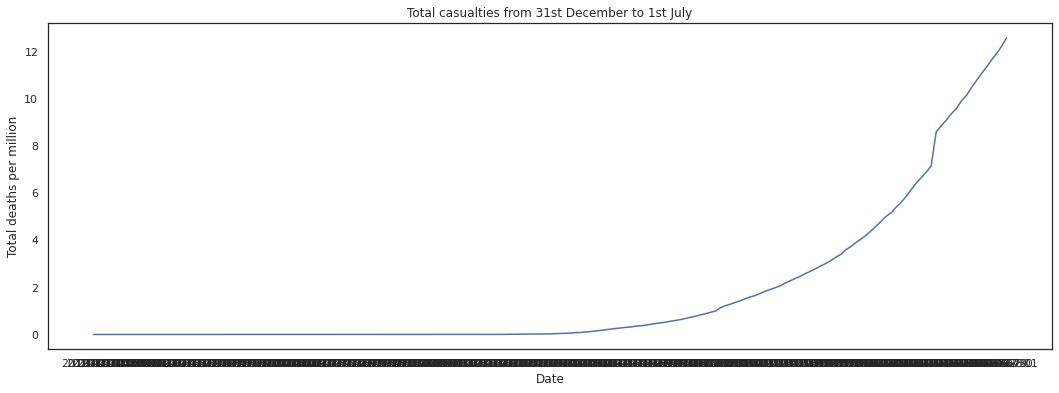

In [161]:
# Plotting no.of casualties in India due to Covid-19

plt.figure(figsize=(18,6))
sns.set_style("white")
plt.xlabel("Date")
plt.ylabel("Total deaths per million")
plt.title("Total casualties from 31st December to 1st July")

plt.plot(india_df['date'], india_df['total_deaths_per_million'])
plt.show()

**From the above plot we can see how the total-deaths have increased exponentially.**